In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
dataframe =pd.read_excel("gun_data.xlsx")
dataframe.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [4]:
# Get and print the column names
columns = dataframe.columns


# Display the first few rows of the dataframe
dataframe

month          state   permit  permit_recheck  handgun  long_gun  \
0      2017-09        Alabama  16717.0             0.0   5734.0    6320.0   
1      2017-09         Alaska    209.0             2.0   2320.0    2930.0   
2      2017-09        Arizona   5069.0           382.0  11063.0    7946.0   
3      2017-09       Arkansas   2935.0           632.0   4347.0    6063.0   
4      2017-09     California  57839.0             0.0  37165.0   24581.0   
...        ...            ...      ...             ...      ...       ...   
12480  1998-11       Virginia      0.0             NaN     14.0       2.0   
12481  1998-11     Washington      1.0             NaN     65.0     286.0   
12482  1998-11  West Virginia      3.0             NaN    149.0     251.0   
12483  1998-11      Wisconsin      0.0             NaN     25.0     214.0   
12484  1998-11        Wyoming      8.0             NaN     45.0      49.0   

        other  multiple  admin  prepawn_handgun  ...  returned_other  \
0       221.0       317    0.0             15.0  ...             0.0   
1       219.0       160    0.0              5.0  ...             0.0   
2       920.0       631    0.0             13.0  ...             0.0   
3       165.0       366   51.0             12.0  ...             0.0   
4      2984.0         0    0.0              0.0  ...             0.0   
...       ...       ...    ...              ...  ...             ...   
12480     NaN         8    0.0              NaN  ...             NaN   
12481     NaN         8    1.0              NaN  ...             NaN   
12482     NaN         5    0.0              NaN  ...             NaN   
12483     NaN         2    0.0              NaN  ...             NaN   
12484     NaN         5    0.0              NaN  ...             NaN   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
0                  0.0               0.0                   9.0   
1                  0.0               0.0                  17.0   
2                  0.0               0.0                  38.0   
3                  0.0               0.0                  13.0   
4                  0.0               0.0                   0.0   
...                ...               ...                   ...   
12480              NaN               NaN                   NaN   
12481              NaN               NaN                   NaN   
12482              NaN               NaN                   NaN   
12483              NaN               NaN                   NaN   
12484              NaN               NaN                   NaN   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
0                       16.0                 3.0                       0.0   
1                       24.0                 1.0                       0.0   
2                       12.0                 2.0                       0.0   
3                       23.0                 0.0                       0.0   
4                        0.0                 0.0                       0.0   
...                      ...                 ...                       ...   
12480                    NaN                 NaN                       NaN   
12481                    NaN                 NaN                       NaN   
12482                    NaN                 NaN                       NaN   
12483                    NaN                 NaN                       NaN   
12484                    NaN                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
0                            0.0                     3.0   32019  
1                            0.0                     0.0    6303  
2                            0.0                     0.0   28394  
3                            2.0                     1.0   17747  
4                            0.0                     0.0  123506  
...                          ...                     ...     ...  
12480               

In [5]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

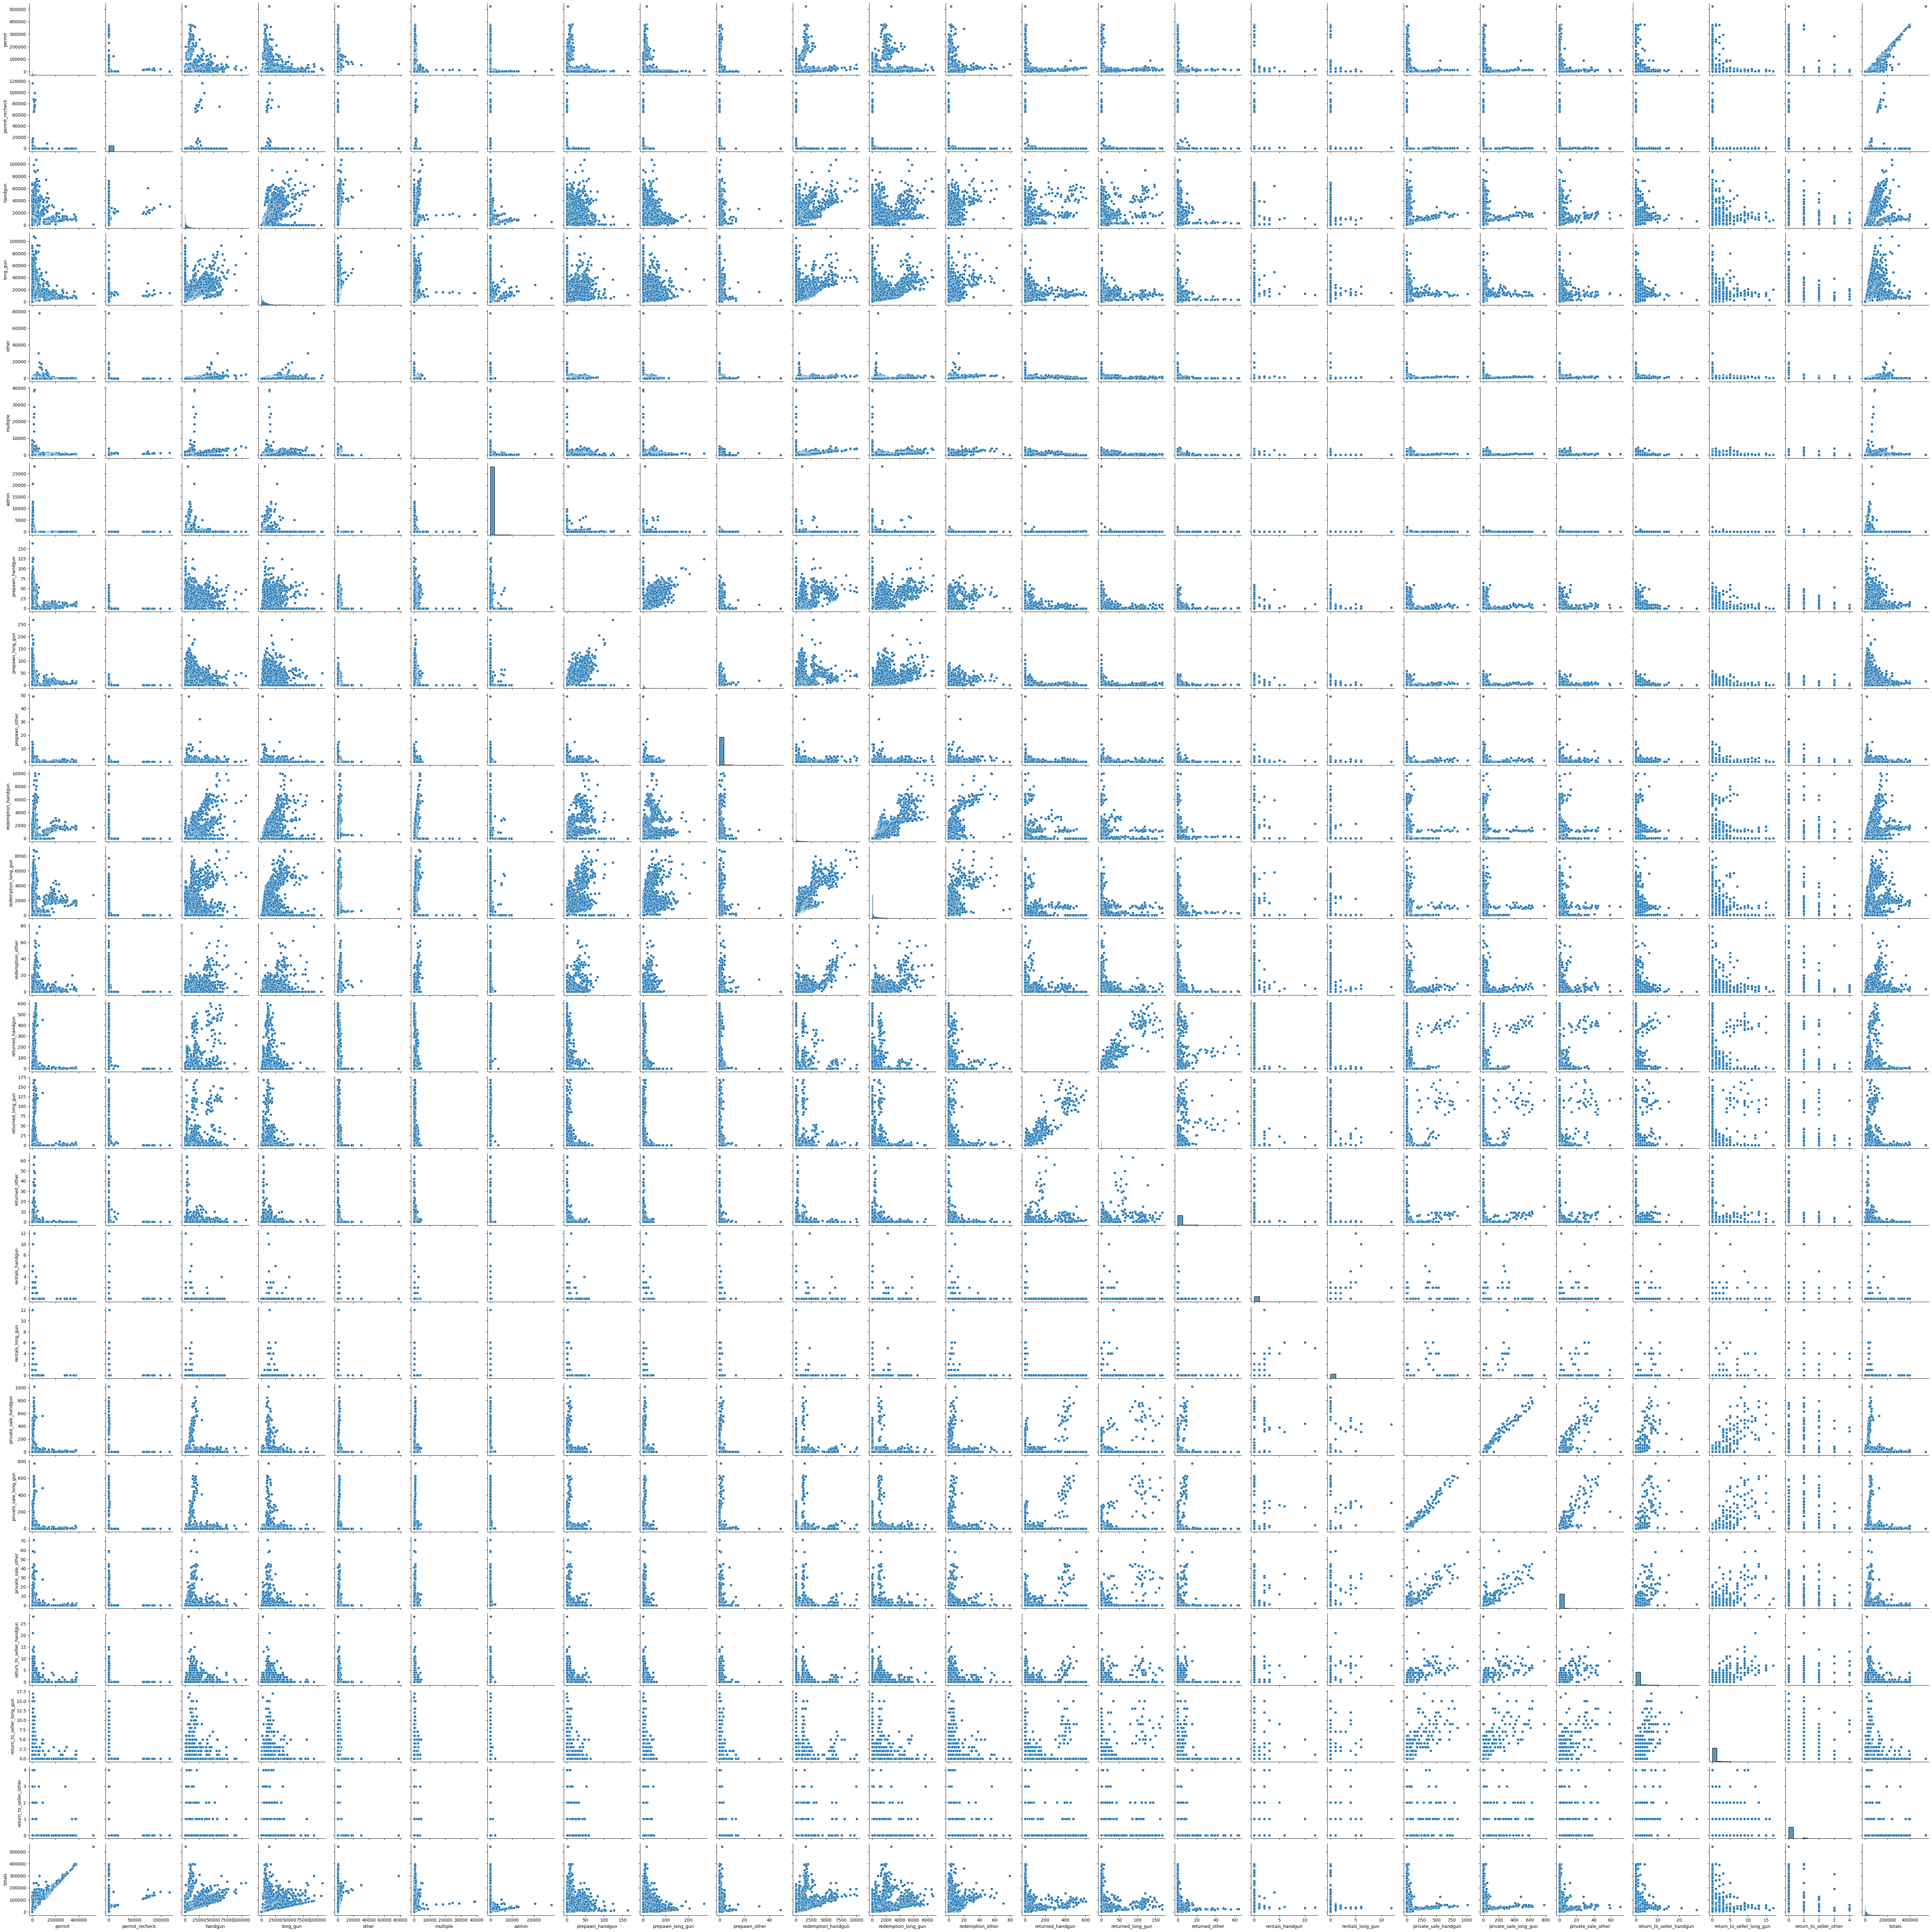

In [7]:
plt.figure(figsize=(15, 8))
sns.pairplot(dataframe)
plt.show()

####Perform EDA (Exploratory Data Analysis)

Exploring involves finding patterns in
your data, visualizing relationships in your data, and building intuition about
what you’re working with. After exploring, you can do things like remove
outliers and create better features from your data, also known as feature
engineering.

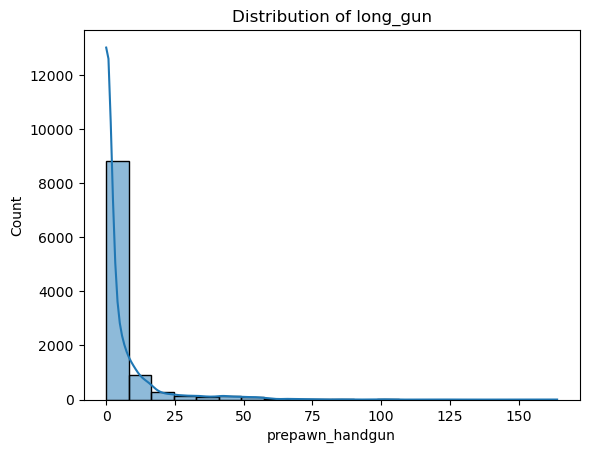

In [19]:
sns.histplot(dataframe['prepawn_handgun'], bins=20, kde=True)
plt.title('Distribution of long_gun')
plt.xlabel('prepawn_handgun')
plt.ylabel('Count')
plt.show()

Visualize of the dataset

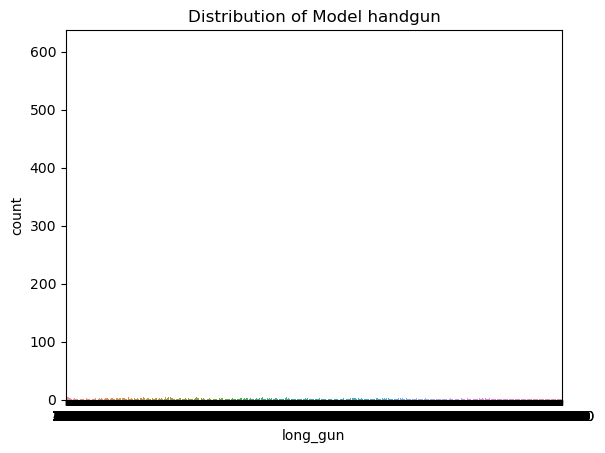

In [13]:
# Visualize the distribution of 'Model Year'
sns.countplot(x='long_gun', data=dataframe)
plt.title('Distribution of Model handgun')
plt.show()





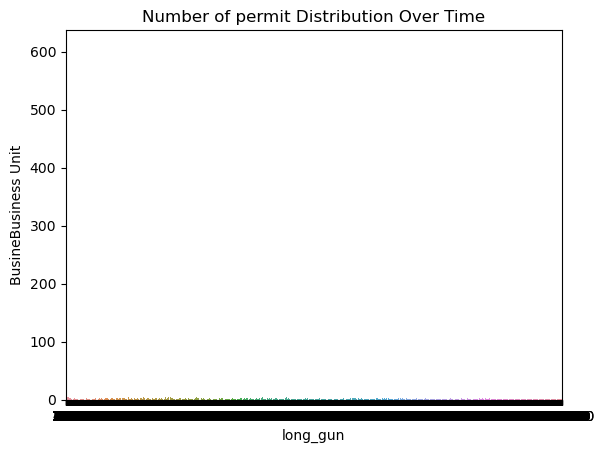

In [22]:
# Visualize the distribution of 'Number of Department  distribution'
sns.countplot(x='long_gun', data=dataframe)
plt.title('Number of permit Distribution Over Time')
plt.xlabel('long_gun')
plt.ylabel('BusineBusiness Unit')
plt.show()

###Draw conclusions

The FBI Gun data is a collection of statistics related to firearm background checks conducted through the National Instant Criminal Background Check System (NICS) in the United States. These checks are often associated with firearm purchases and can serve as an indicator of gun sales, although they don't precisely represent the number of guns sold due to variations in state laws and other factors.

Here are several conclusions that can be drawn from analyzing the FBI Gun data:

Trends in Gun Purchases: Analyzing the data over time reveals fluctuations and trends in gun purchases. Certain events, such as legislative changes, elections, or national incidents, might coincide with increased or decreased background checks, reflecting changes in gun sales.

Seasonal Patterns: There might be seasonal patterns in gun sales, with certain times of the year, like holidays or hunting seasons, showing increased background checks.
